In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
#  Load & Clean Data
df = pd.read_csv("/content/marketing_campaign.csv",sep='\t')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [56]:
# Handle missing income values
df = df.dropna(subset=["Income"])

# Create Age from Year_Birth
df["Age"] = 2025 - df["Year_Birth"]

# Household size = Adults + Kids + Teens
df["Household_Size"] = 1 + df["Kidhome"] + df["Teenhome"]

In [57]:
# Total spending (sum of product categories)
spend_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts",
              "MntSweetProducts","MntGoldProds"]
df["Total_Spending"] = df[spend_cols].sum(axis=1)

In [58]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Household_Size,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,68,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,71,3,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,60,1,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,41,2,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,44,2,422


In [59]:
#  Demographics analysis
print("Average Age:", df["Age"].mean())
print("Average Income:", df["Income"].mean())


Average Age: 56.17960288808664
Average Income: 52247.25135379061


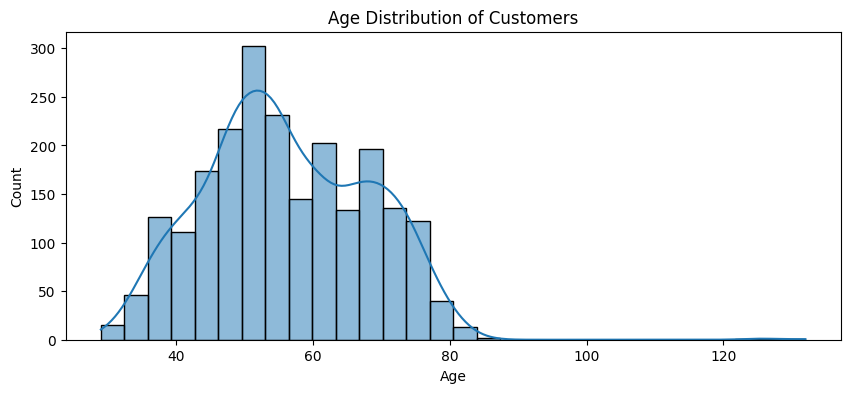

In [60]:
plt.figure(figsize=(10,4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.show()

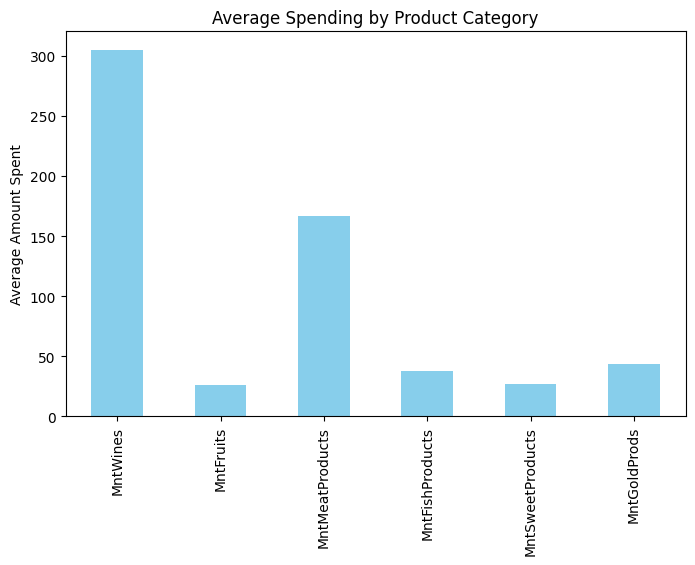

In [61]:
plt.figure(figsize=(8,5))
df[spend_cols].mean().plot(kind="bar", color="skyblue")
plt.title("Average Spending by Product Category")
plt.ylabel("Average Amount Spent")
plt.show()

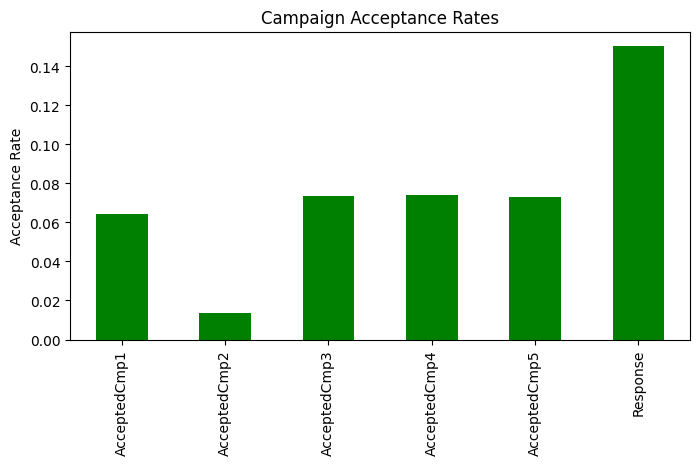

In [62]:
campaign_cols = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
campaign_success = df[campaign_cols].mean()
campaign_success.plot(kind="bar", figsize=(8,4), color="green", title="Campaign Acceptance Rates")
plt.ylabel("Acceptance Rate")
plt.show()

In [63]:
"""Segment customers by Age and Income for targeted promotions
 High spending on Wines and Meat  focus premium offers there
 Campaign 3 and 4 have higher acceptance replicate those tactics"""

'Segment customers by Age and Income for targeted promotions\n High spending on Wines and Meat  focus premium offers there\n Campaign 3 and 4 have higher acceptance replicate those tactics'

In [64]:
# Save cleaned dataset
df.to_csv("customer_personality_clean.csv", index=False)
